# Notebook E-tivity 3 CE4021 Task 1

Student name: Collin Czernel

Student ID: 

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

Task #1: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

If we are looking to find the probability that a dice roll will be less than 3 and greater than 10 for two, six sided
dice, this boils down to only a few "results" of each roll. Less than 3 gives only 2 as a result, and greater than
10 only gives 11, 12 as a result. e.g. sum < 3 (so 2 is the only option) and sum > 10 (so 11, 12 are the only options)

Looking at 2, the only possible option is (1, 1). 
Looking at 11, the only possible options are (5, 6) and (6, 5).
Looking at 12, the only possible option is (6, 6). 

So, there are 4 possible outcomes for which we are considering "success" cases. There are 36 total possible outcomes 
when rolling two six sided dice, so our probability is  4/36 = 1/9 that the sum of the two dice is less than 3 or 
greater than 10. This is 11.111111...%. This is the value for which we are looking to experimentally verify by running a simulator and 
tracking the results.

To simulate this, we will just create a program to run a dice roll simulator X times and store the results as a counter (to avoid saving 100,000+ ints in an array, especially if we are looking to do this 1,000,000+ times).. Then, we can
plot this using a histogram to visualise the probabilities. From there we can simply calculate the expected number vs 
the experimentally obtained number (e.g. for 10,000 dice rolls, we expect ~1,111 "success" cases).

The standard deviation of the counter list can be simply calculated by finding first the mean (which is just the sum of rolls/number of rolls), then the variance. The variance is the difference between each possible roll and the mean, squared, multiplied by the number of times that roll happened, and then averaged across the data (so divided by the number of trials). The standard deviation is simply the square root of the variance. So for our purposes, the variance of our counter data can be represented by the formula $\sigma^2 = \frac{1}{N} \sum \text{count}[i] \cdot \left( (i + 2) - \bar{x} \right)^2$. the term $i + 2$ comes from the way the counter was stored, such that the index = sum of dice - 2 (e.g. count[0] represents the number of "2"s rolled, $\bar{x}$ is the mean, previously calculated, and $N$ is the number of rolls (trials).

We will use our code below to experimentally try and verify this number by looking at the standard deviation of the results of our dice roll simulator.

<hr style=\"border:2px solid gray\"> </hr>

In [27]:
trial = 1000000 # How many times are we rolling the dice?
def roll_dice(trial): # Function to do random.randint from 1, 6 (e.g. sides of the dice), sum the two dice, and save into counter list
    count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(0, trial):
        result = random.randint(1, 6) + random.randint(1, 6) # Using a counter list instead of storing every value to save memory usage for large trials
        count[result-2] += 1
    return count

# So the way it works is quite simple. Since we have only 11 possible outcomes, we make a list of length 11 (indexes 0->10)
# The "value" of the sum of the two dice is equivalent to the index+2. e.g. 2 being the lowest value is assigned in the count[0] index. 
# This way, we have a full count list with the index being the key for future use. 

In [11]:
def plot_distribution(count): # plotting a histogram of results. code largely taken from stackoverflow. note this is not the probability, but the values
    sums = list(range(2, 13))
    plt.figure(figsize=(8, 6))
    plt.bar(sums, count, width=0.8, color='blue', edgecolor='black')
    plt.title('Sum of two six sided die distribution')
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Frequency')
    plt.xticks(range(2, 13))
    plt.show()

Since we are not storing the actual values, but using a counter, we need to do things a bit differently to calculate things like the mean, standard deviation, etc. 

The mean is relatively straightforward - we just need to find the the total number of results * frequency, then divide by the number of trials. In equation form, this is $\bar{x} = \frac{\Sigma(r * f)}{t}$, where r is the sum of the results (in this case, either 2-12), f is the frequency of each of those rolls (e.g. the stored values in the count list), and t is the number of trials.

The variance is, as posted above, just the difference from result and mean, squared, and then divided by total number of rolls. We then square root this to find the standard deviation.

In [14]:
def calc_mean(count): # Function to calculate the mean of our data generated by roll_dice()
    x = 0 # Establish x as 0 so we can use multiple times
    mean = 0 # Establish the mean as 0 so we can use multiple times
    for i in range(0, len(count)):
        x += (i+2)*count[i] # Storing the "sum" of these values in x to be used to calc mean
    mean = x/sum(count) # The mean is the sum of the values x divided by the number of rolls (trial)
    return mean

In [16]:
def calc_std_dev(count): # Function to calculate the std deviation of the data stored in count
    mean = calc_mean(count) # first using the mean of the data set 
    var = 0 # Setting variable to store the sum of the values
    trials = sum(count) # number of dice rolls 
    for i in range(0, len(count)): 
        var += count[i] * ((i+2)-mean) ** 2 # formula from above
    variance = var/trials # dividing our first term by the number of trials
    print("The mean of the data is: " + str(mean))
    print("The variance is: " + str(variance)) 
    print("The standard deviation is: " + str(math.sqrt(variance)))

In [18]:
def calc_success(count): # Function to determine the probability of less than 3 or greater than 10 in our randomly generated data
    success = count[0] + count[9] + count[10] # The successful rolls of 2, 11, 12
    success_percentage = (success/sum(count) * 100) # Turning the result into a percentage
    print("The success rate of the sample rolls is: " + str(success_percentage) + "% ")
    print("e.g. for this randomly sampled data, " + str(success) + " rolls were 2, 11, or 12 out of " + str(sum(count)) + " overall rolls")

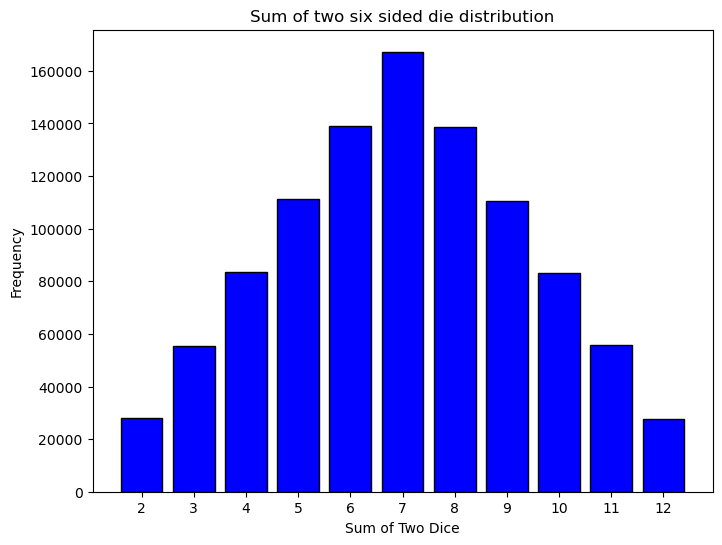

The mean of the data is: 6.997508
The variance is: 5.8284077899360005
The standard deviation is: 2.4142095579994707
The success rate of the sample rolls is: 11.120800000000001% 
e.g. for this randomly sampled data, 111208 rolls were 2, 11, or 12 out of 1000000 overall rolls


In [29]:
results = roll_dice(trial)

plot_distribution(results) # Plotting after we roll_dice(trial) using count return
calc_mean(results) # Calculating the mean after we roll_dice(trial)
calc_std_dev(results)
calc_success(results)

So, again looking at our theoretical expected values. For a pair of dice, the expected:
* number of 2, 11, or 12 rolls is 1/9, or 11.111%.
* mean is 7.
* standard deviation is 2.415

Looking at the values abov, for a trial of 100,000 rolls, our experimental values are:
* Number of 2, 11, or 12 rolls: 11.1208%
* Mean is 6.997508
* Standard Deviation is 2.41542

The variable that is the sum of six sided die is a discrete random variable, e.g. it is a countable number of random, distinct values (e.g. 2-12).
I used a bar chart to portray the distribution as I believe for this example it is the best way to show the probability distribution for the possible
results over a large sample. Dice rolling probability distribution is a normal distribution with the peak at the sum of two die equalling 7, as shown by the output graph. 

This can be easily explained given the number of possible rolls equalling the number of sums. For example, for a dice roll of 2, there are only 2
possible rolls that can achieve this: (1, 1). For a sum of 7, there are many, e.g. (2, 5), (3, 4), (6, 1), etc. So, for random rolling across a large 
sample it is clear that you would expect a triangular distribution (this can also be seen in the board game Settlers of Catan, of which I am a fan, 
and shows why 6/8/9 are the best tiles to settle on, and why 7 is rolled so often for the robber). As per our previous calculations, we expect the "success" cases to be 1/9 or ~11.111%. That is, rolling a 2, 11, or 12, which is verified by the above results (e.g. the average value taken for several tests of 100,000 rolls is ~11.1619999%, and with larger sample rolls it will trend towards 11.111%). The standard deivation of relates to the average deviation from the mean. From our calculations, we expected the standard deviation to be $\sigma =2.415$. Experimentally, we found the standard deviation of our simulation to be $\sigma = 2.4152245%$ which is extremely close. Again, a larger trial size would increase the accuracy and more align with the theoreitcal calculation.


<hr style=\"border:2px solid gray\"> </hr>

## Reflection

I enjoyed this e-tivity task immensely. I am a big fan of the game Settlers of Catan, which heavily relies on two die and the "popular" numbers, so it was very interesting to see the theory behind the game (and then to "experimentally" verify it through simulation). I also want to thank Rebecca and Henry - my initial code simply stored things in an array (I uploaded it to GitHub just for reference - it's titled Etivity3-Task1-Old), but Rebecca's mention of memory efficiency threw me off course (in a good way!). I realized that for a trial of say 1,000,000, it would use a massive amount of memory to run the code, since every number was being stored individually. I realized that I could simply use a counter list to store this data, and thus reduce the number of ints stored to 11. Henry's comments as well were very helpful in revisiting some of my design choices and implementing better ways to run the code.